In [1]:
from pylab import *
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.morphology import disk, dilation, erosion
from skimage.exposure import equalize_adapthist

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from scipy.stats import moment

## Wstępne przetworzenie obrazu

In [2]:
def image_preprocessing(image):
    image = img_as_float(plt.imread(image))

    mask = rgb2gray(image)
    mask[mask > 0.15] = 1
    mask[mask <= 0.15] = 0
    mask = -mask
    mask = erosion(mask, disk(1))
    mask = dilation(mask, disk(5))
    mask = erosion(mask, disk(2))

    image = image[:,:,1]
    image = equalize_adapthist(image, clip_limit=0.02)
    
    image[mask == 0] = 0
    
    return image

## Wczytanie danych

In [3]:
folder = 'pictures/'
images = ['im0001', 'im0002', 'im0003', 'im0004', 'im0005', 'im0044', 'im0077', 'im0081',
          'im0082', 'im0139', 'im0162', 'im0163', 'im0235', 'im0236', 'im0239', 'im0240',
          'im0255', 'im0291', 'im0319', 'im0324']
in_img = '.ppm'
out_img = '.ah.ppm'

In [4]:
# image_data = []
# image_target = []

# for img in images:
#     image_data += [image_preprocessing(folder + img + in_img)]
#     image_target += [img_as_float(plt.imread(folder + img + out_img))]

# na razie biorę pod uwagę jeden obraz, na którym się uczę:
image_data = image_preprocessing("pictures/im0077.ppm")
image_target = img_as_float(plt.imread("pictures/im0077.ah.ppm"))

## Ekstrakcja cech z obrazu

In [5]:
def features_create(img_data):
    x, y = image_data.shape
    variance = []
    central_moment_3 = []
    central_moment_4 = []
    for i in range(x // 5):
        for j in range(y // 5):
            img_data = image_data[5*i : 5*(i+1), 5*j : 5*(j+1)].flatten()
            variance += [moment(img_data, moment = 2)]
            central_moment_3 += [moment(img_data, moment = 3)]
            central_moment_4 += [moment(img_data, moment = 4)]
    return list(zip(variance, central_moment_3, central_moment_4))
            
def label_create(img_target):
    x, y = img_target.shape
    target = []
    for i in range(x // 5):
        for j in range(y // 5):
            img_target = image_target[5*i : 5*(i+1), 5*j : 5*(j+1)]
            target += [img_target[2,2]]
    return target

## Klasyfikator

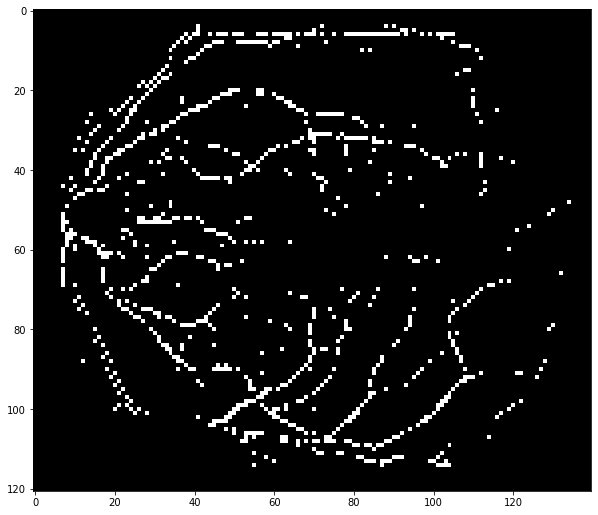

In [6]:
features = features_create(image_data)
label = label_create(image_target)

pct = features_create(image_preprocessing("pictures/im0001.ppm"))

model = KNeighborsClassifier(n_neighbors=15)
model.fit(features,label)
predicted = model.predict(pct)

x, y = image_data.shape
predicted = np.array_split(predicted, x//5)

plt.figure(figsize=(10, 10))
plt.imshow(predicted, cmap=plt.cm.gray)